# - Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1. Initial Data Understanding 
 - Data Loading 
 - Data Type 
 - Missing Values
 - Duplicates
 --------------------
 - Reading File and Loading :

In [2]:
MetaData = pd.read_excel(r"..\MetaData\MetaData.xlsx")
MetaData.to_csv(r"..\MetaData\MetaData.csv")


In [6]:
DF_Row = pd.read_csv(r"..\train_data.csv", low_memory= False)
Test_Row = pd.read_csv(r"..\test_data.csv")

#To Show all The Columns 
pd.set_option("display.max_columns", None)

# Make a copy for Cleaning (Deep Copy)
DF = DF_Row.copy()
DF_Test = Test_Row.copy()
# Target : 
DF_y = DF["contest-tmp2m-14d__tmp2m"]

----------------
- The First 5 Rows :

In [7]:
DF.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

-----------
- Shape Of The DataSet : 

In [8]:
DF.shape

(375734, 246)

----------------
-  Drop The "Target" Column From The DataSet :

In [9]:
DF.drop(columns="contest-tmp2m-14d__tmp2m",inplace= True)

----------


- As we can see the column "index" we dont need it so i'm gonna drop it :

In [10]:
DF.drop(columns="index", inplace= True)

--------------
- Check Shapes : 

In [11]:
print(f"The Shape of The Data Frame : {DF.shape}\n")

The Shape of The Data Frame : (375734, 244)



In [12]:
print(f"The Shape of The Target : {DF_y.shape}\n")

The Shape of The Target : (375734,)



------------
- Information About The DataSet : 

In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 244 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(239), int64(3), object(2)
memory usage: 699.5+ MB


------------
- The Data Type of each Columns :

In [14]:
DF.dtypes

lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
nmme0-tmp2m-34w__cancm30              float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18                 float64
wind-vwnd-925-2010-19                 float64
wind-vwnd-925-2010-20                 float64
Length: 244, dtype: object

-----------
- lets get the Data Type Of Each Columns in a csv file and read them all :

In [15]:
DF.dtypes.to_csv(r"..\MetaData\Column's_DataTypes.csv")

-----------------
- Count Null Values : 

In [16]:
DF.isnull().sum()

lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
nmme0-tmp2m-34w__cancm30              0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 244, dtype: int64

------------
- lets get the NULL Values Of Each Columns in a csv file and read them all : 


In [17]:
DF.isnull().sum().to_csv(r"..\MetaData\Null_Values.csv")

----------------
- Or "Show Only the Coulmns That Contain Null" :

In [18]:
Null = DF.isnull().sum()
Null[Null>0]

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

-------------
- Visualize The NULL Value :

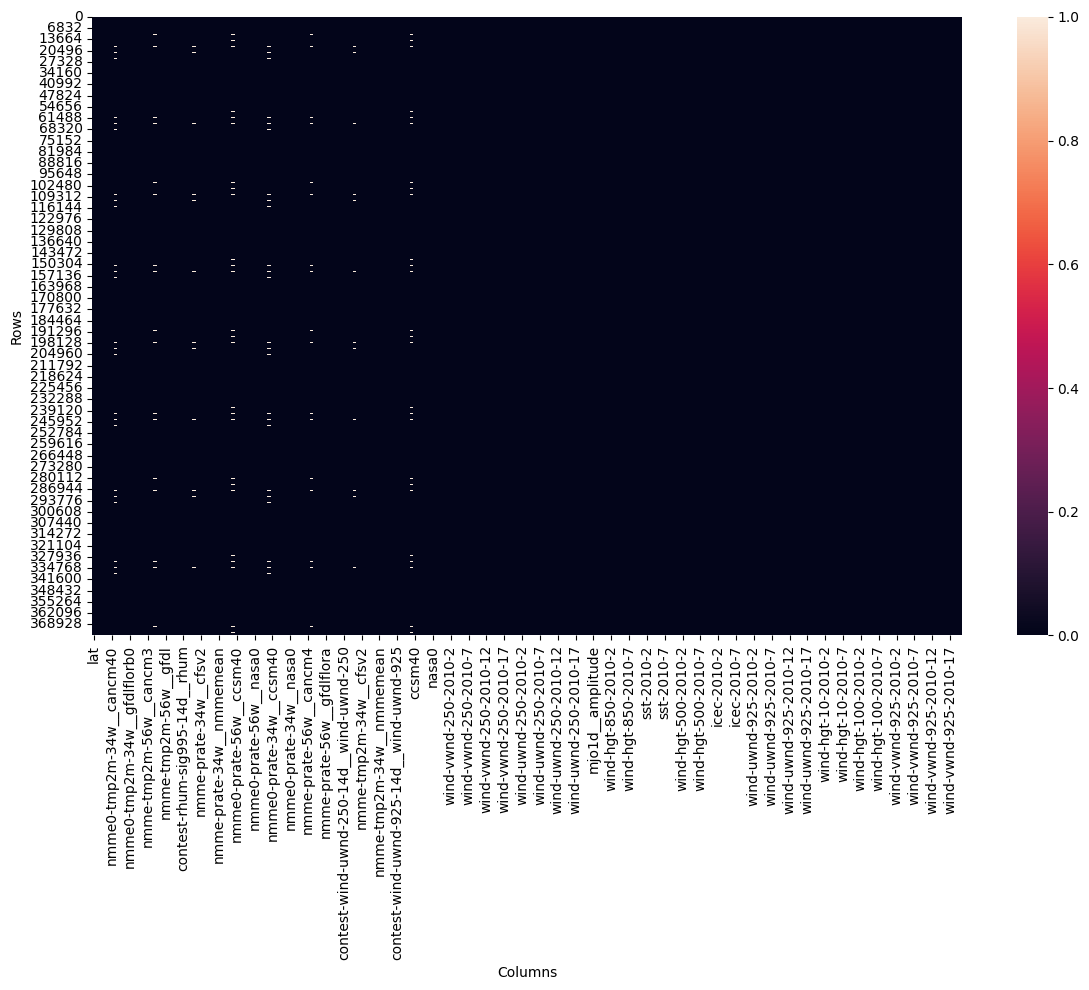

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(DF.isnull())
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

---------------
- Count Duplicate  :

In [20]:
DF.duplicated().sum()

np.int64(0)

In [21]:
# To Make Sure :
DF.drop_duplicates(inplace= True)

# 2. Basic Statistical Overview :
- Summary Statistics (describe(), value_count())
------------------

- Describe() For Numerical Columns :

In [22]:
DF.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8,wind-

---------------
- Describe() for Target Column :

In [23]:
DF_y.describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

-------------
- Visualize The Target Column :

<function matplotlib.pyplot.show(close=None, block=None)>

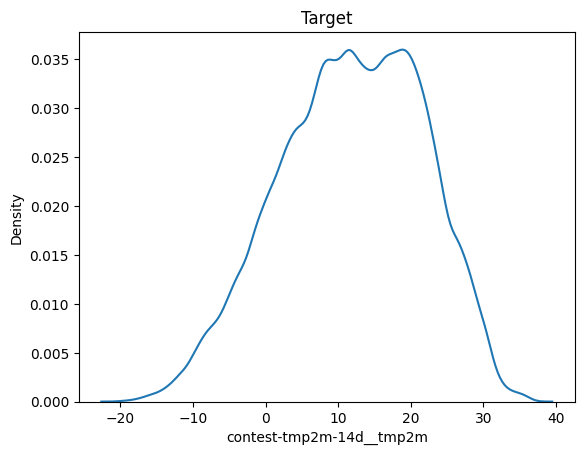

In [24]:
sns.kdeplot(DF_y)
plt.title("Target")
plt.show

-----------
- Describe() For Categorical Columns :

In [25]:
DF.select_dtypes(include="object").describe()

,startdate,climateregions__climateregion
count,375734,375734
unique,731,15
top,9/1/14,BSk
freq,514,139621


<Axes: ylabel='climateregions__climateregion'>

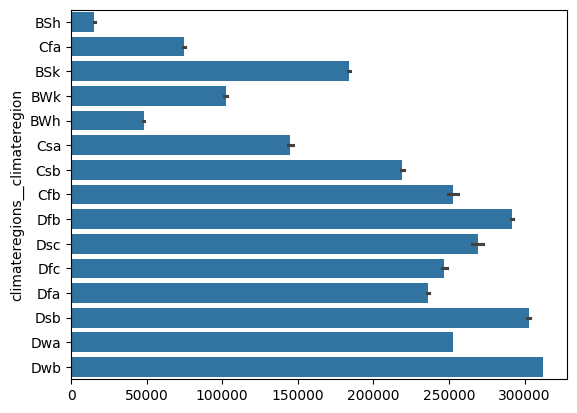

In [26]:
sns.barplot(DF["climateregions__climateregion"])

## 3. Distribution Of Variables  
- Numerical Features (Histograms , KDE)
- Categorical Features (Bar plots , Check Imbalancement)
- Outlier Detection

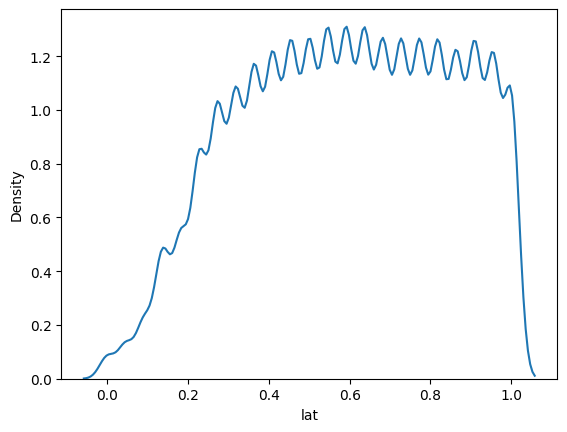

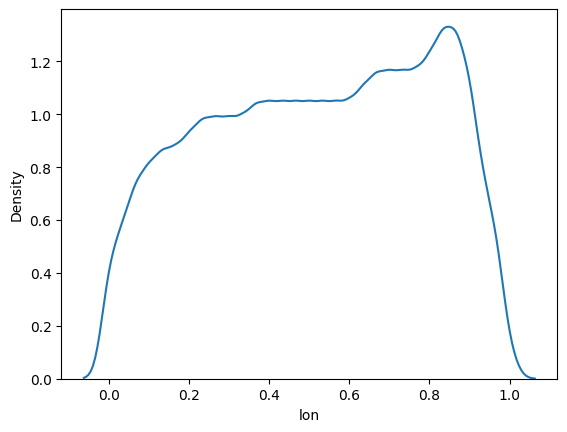

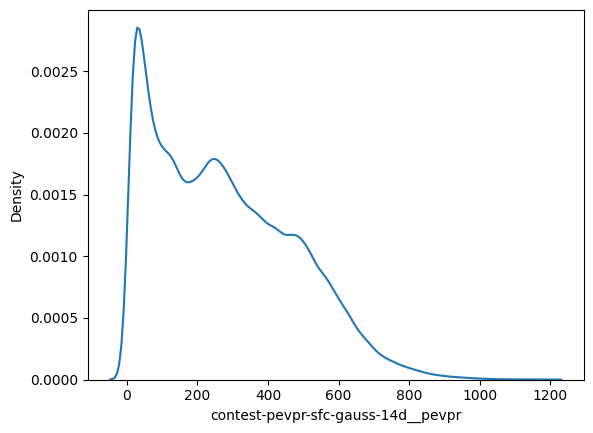

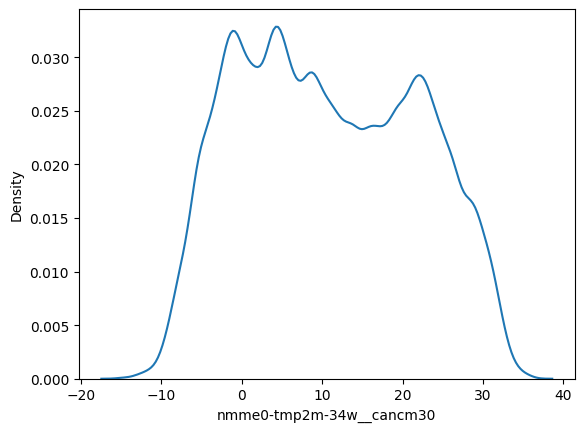

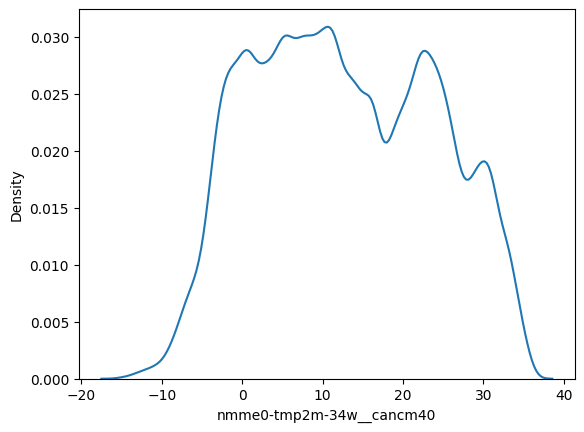

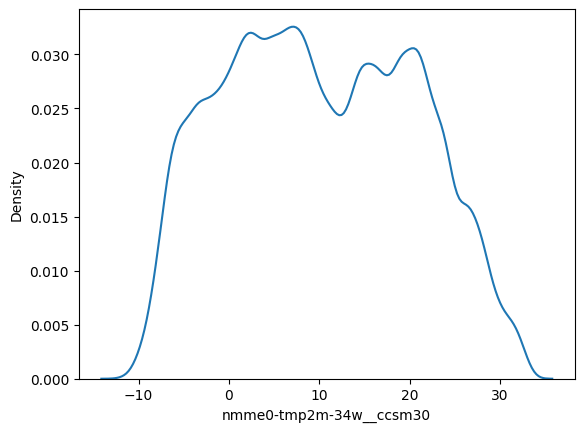

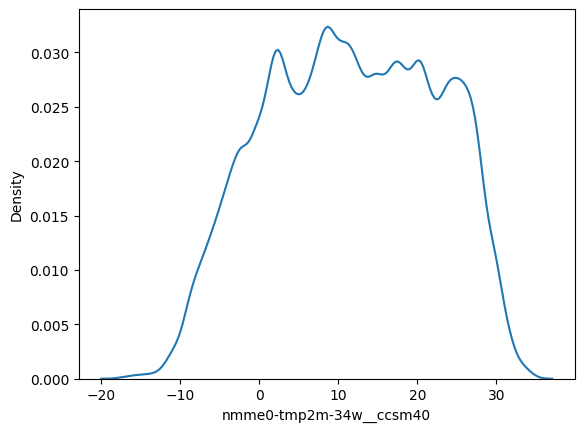

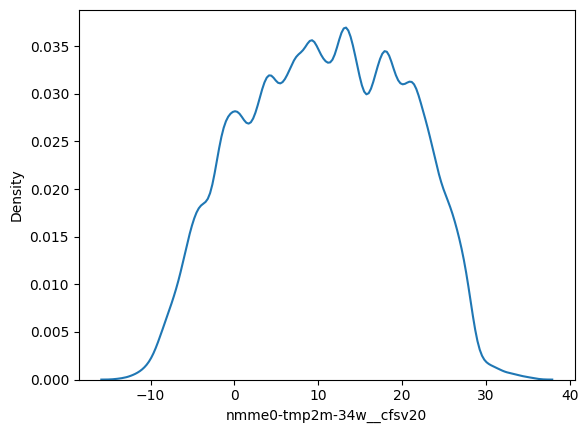

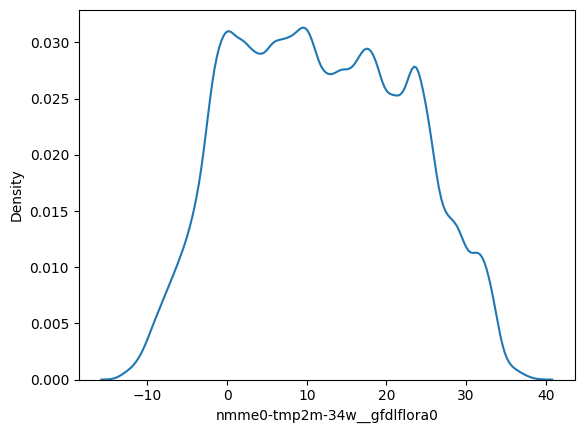

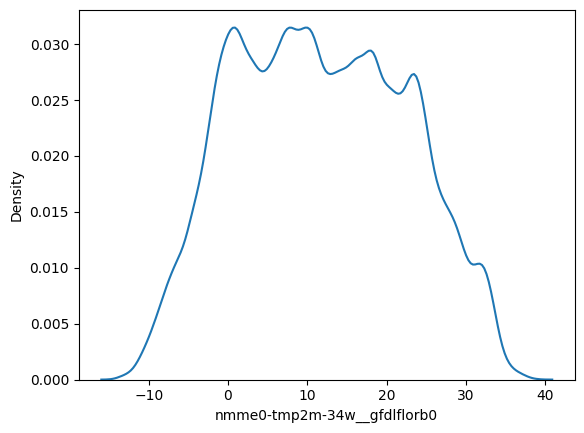

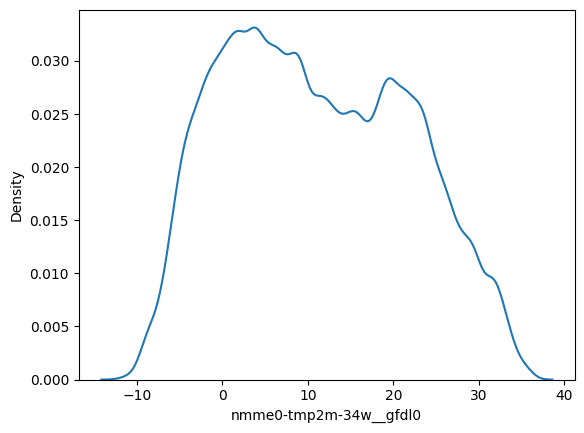

<Figure size 640x480 with 0 Axes>

In [27]:
# For The First 10 Columns "cause we got a lot of columns so i'm gonna show a sample": 
for i,Col in enumerate(DF.select_dtypes('number').columns):
    sns.kdeplot(DF[Col])
    plt.show() 
    if i == 10:
        break

plt.tight_layout()
plt.show()    

------------
- Check The Outlier :

<Axes: ylabel='contest-tmp2m-14d__tmp2m'>

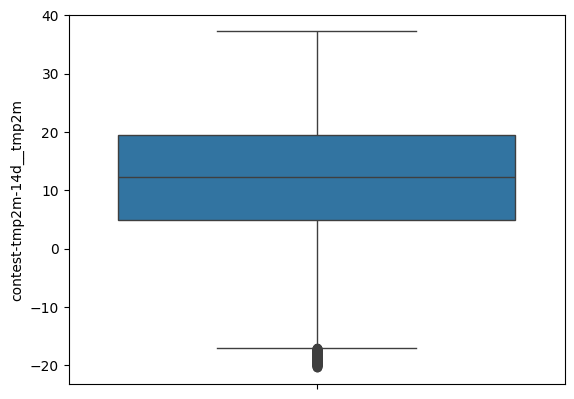

In [28]:
sns.boxplot(DF_y)

<Axes: ylabel='climateregions__climateregion'>

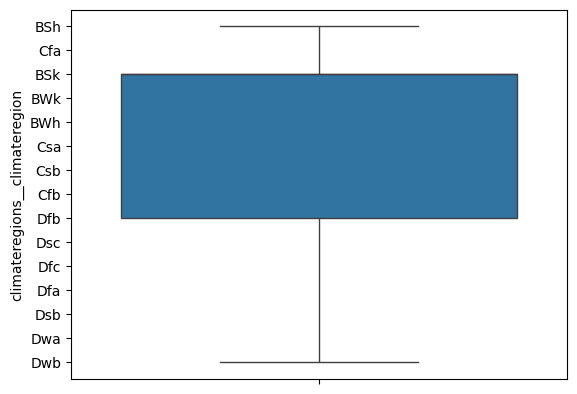

In [29]:
sns.boxplot(DF["climateregions__climateregion"])

In [30]:
# For the Categorical Column 
# sns.kdeplot(DF.select_dtypes("object"))
# plt.show() 
    

## 4. Correlations 

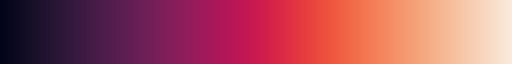

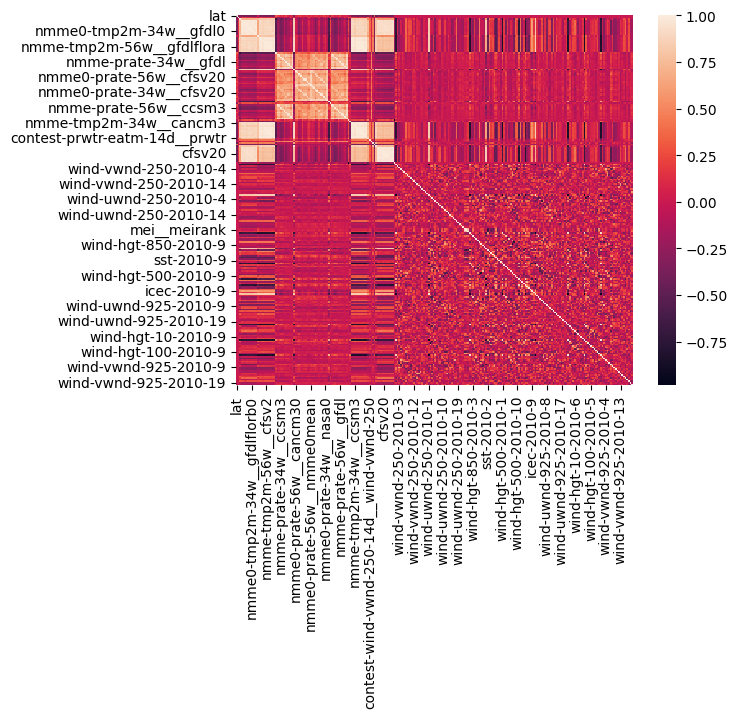

In [31]:
sns.heatmap(DF.select_dtypes("number").corr())
sns.color_palette("rocket", as_cmap=True)           # Did This After Back to Seaborn doc

# 5. Feature Interaction 
- Scatter Plots :

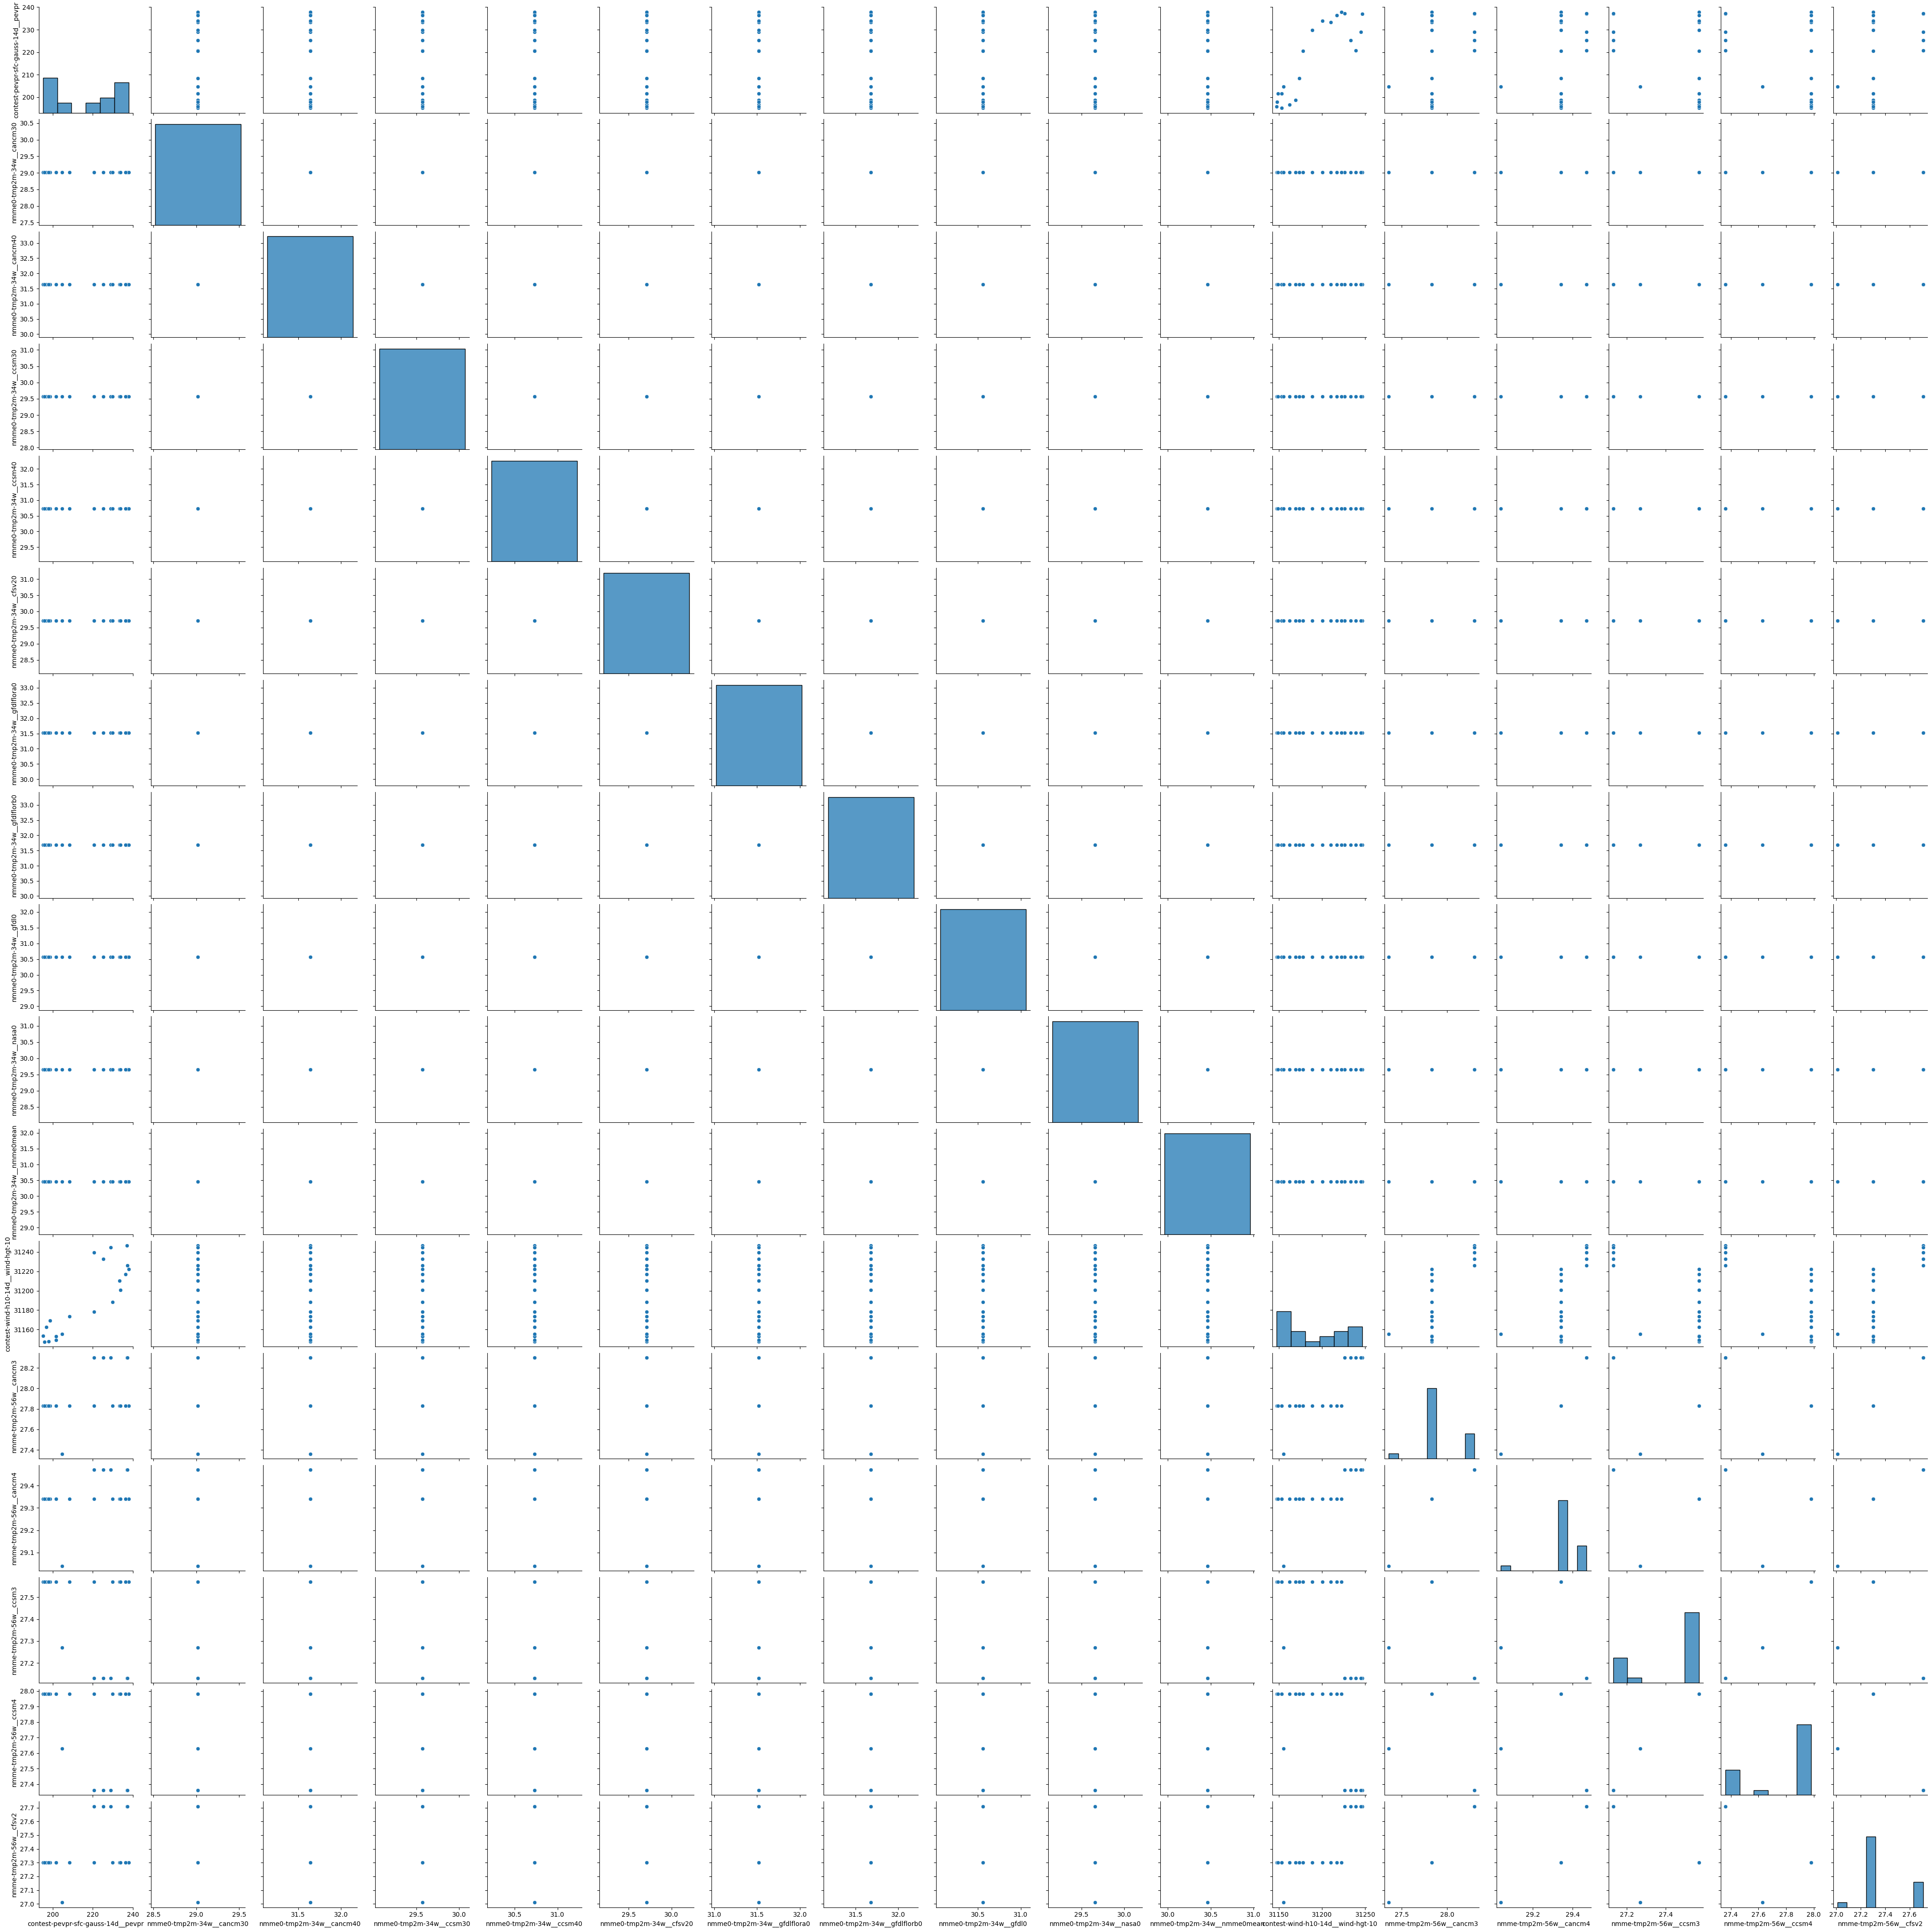

In [32]:
# only For The First 20  Rows &  2 - 20 Columns 
sns.pairplot(DF.iloc[:20,2:20])

# 6. Target Variable Analysis 
- Relationship with Predictors (Scatter Plots, Box Plot Against The Target) :

Text(0.5, 1.0, 'ScatterPlot Of Target and Categorical Colmn')

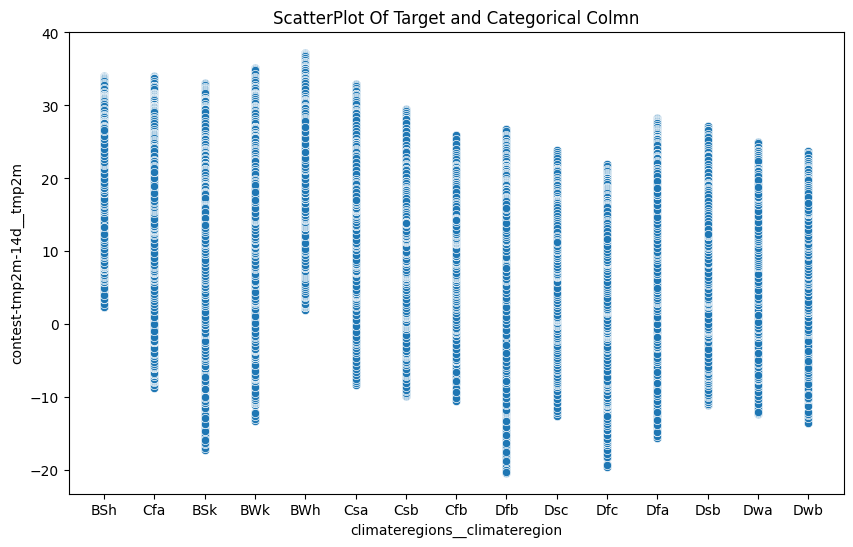

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=DF["climateregions__climateregion"] , y=DF_y)
plt.title("ScatterPlot Of Target and Categorical Colmn")

In [34]:
DF.shape , DF_y.shape

((375734, 244), (375734,))

# - More Visualization and Analysis :

In [ ]:
# Line Plot of Mean Temperature Over Time
# Visualize how the mean temperature changes over time

plt.figure(figsize=(14, 7))
sns.lineplot(x='startdate', y='contest-tmp2m-14d__tmp2m', data=DF)
plt.title('Mean Temperature Over Time')
plt.xlabel('Start Date')
plt.ylabel('Mean Temperature (14 days)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='lat', y='contest-tmp2m-14d__tmp2m', data=DF)
plt.title('Latitude vs. Mean Temperature (14 days)')
plt.xlabel('Latitude')
plt.ylabel('Mean Temperature (14 days)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='lon', y='contest-tmp2m-14d__tmp2m', data=DF)
plt.title('Longitude vs. Mean Temperature (14 days)')
plt.xlabel('Longitude')
plt.ylabel('Mean Temperature (14 days)')

plt.tight_layout()
plt.show()

In [ ]:
print(DF["climateregions__climateregion"].unique())
sns.barplot(DF["climateregions__climateregion"].value_counts().sort_values())

In [ ]:
#let's RE-read the Columns (I put them in a CSV , Excel  files with their Explanation)
DF.head(10)

In [ ]:
DF['climateregions__climateregion'] = pd.factorize(DF.climateregions__climateregion)[0] + 2
# To Do The Correlation For The Whole (Training) dataset

In [ ]:
plt.figure(figsize=(15, 11))
sns.heatmap(DF.corr())
plt.title('Correlation of The DataSet ')
plt.show()

In [ ]:
# Fixing The Date : 
DF['year'] = DF['startdate'].dt.year
DF['month'] = DF['startdate'].dt.month
DF['day'] = DF['startdate'].dt.day
DF = DF.drop('startdate', axis=1)

In [ ]:
# Find columns with near-zero variance : 

# Create an empty list to store the NZV (Near Zero Value) columns
nzv_columns_unique = []

# Loop through each column in the DataFrame
for col in DF.columns:
    # Check the number of unique values in the column
    num_unique_values = DF[col].nunique()
    
    # If the number of unique values is 1, it has near-zero variance
    if num_unique_values == 1:
        nzv_columns_unique.append(col)

print(f"Columns with only one unique value : {nzv_columns_unique}")


In [ ]:
# Columns with Excessive Missing Values ( > 70 - 80 %) :
missing_percentage = DF.isnull().sum() / len(DF) * 100
columns_to_drop_missing = missing_percentage[missing_percentage > 70].index # Example threshold
print(f"Columns with Excessive Missing Values (Length of the List) : {len(columns_to_drop_missing)}")

DF = DF.drop(columns=columns_to_drop_missing)

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='contest-tmp2m-14d__tmp2m', data=DF)
plt.title('Box Plot of Mean Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (14 days)')
plt.show()

In [ ]:
#  ( Longitude, Latitude ) : 
plt.figure(figsize=(10, 8))
plt.scatter(DF['lon'], DF['lat'], s=50)
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Plot a histogram to visualize the distribution of Elevation
sns.histplot(data=DF, x='elevation__elevation', bins=50, kde=True)
plt.title('Distribution of Elevation')
plt.show()

In [ ]:
# Calculate the skewness of the column
skewness = DF['elevation__elevation'].skew()
print(f"Skewness of ( elevation__elevation ) : {skewness}")

In [ ]:
indices_to_plot = [
    'mjo1d__phase',
    'mjo1d__amplitude',
    'mei__mei',
    'mei__meirank',
    'mei__nip'
]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(indices_to_plot), ncols=1, figsize=(10, 15))
fig.suptitle('Distribution of Meteorological Indices', y=1.02)

# Loop through each column and plot a histogram
for i, col in enumerate(indices_to_plot):
    sns.histplot(data=DF, x=col, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
indices_corr = [
    'mjo1d__phase',
    'mjo1d__amplitude',
    'mei__mei',
    'mei__meirank',
    'mei__nip'
]

# Create a correlation matrix for these columns
correlation_matrix = DF[indices_corr].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Meteorological Indices')
plt.show()

In [ ]:
# Let's visualize the distribution of `contest-tmp2m-14d__tmp2m`
plt.figure(figsize=(10, 6))
sns.histplot(data=DF, x='contest-tmp2m-14d__tmp2m', bins=50, kde=True)
plt.title('Distribution of 14-day Temperature Anomaly (contest-tmp2m-14d__tmp2m)')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [ ]:
# Let's visualize outliers for `contest-precip-14d__precip`
plt.figure(figsize=(10, 6))
sns.boxplot(x=DF['contest-precip-14d__precip'])
plt.title('Box Plot of 14-day Precipitation (contest-precip-14d__precip)')
plt.xlabel('Precipitation')
plt.show()

In [ ]:
#check for correlation
selected_features = [
    'contest-tmp2m-14d__tmp2m',
    'contest-prwtr-eatm-14d__prwtr',
    'contest-precip-14d__precip',
    'contest-rhum-sig995-14d__rhum'
]

# Create a correlation matrix
corr_matrix = DF[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Selected Contest Features')
plt.show()